In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("Automobile_data.csv")

In [3]:
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
data.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [6]:
for col in data:
    print(col, ':', data[col].unique())
    print("--------------------------------------------------------------")

symboling : [ 3  1  2  0 -1 -2]
--------------------------------------------------------------
normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
--------------------------------------------------------------
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
--------------------------------------------------------------
fuel-type : ['gas' 'diesel']
--------------------------------------------------------------
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
--------------------------------------------------------------
drive-whee

In [7]:
data["normalized-losses"].replace("?",np.nan,inplace=True)
data["horsepower"].replace("?",np.nan,inplace=True)


In [8]:
#CHANGING DATA TYPE

data["normalized-losses"]=data["normalized-losses"].astype("float64")
data["horsepower"]=data["horsepower"].astype("float64")

In [9]:
#AS WE HAVE CHECKED MEAN VALUES OF NORMALIZED LOSSES AND HORSEPOWER WE CAN REPLACE
#NAN VALUES WITH MEAN VALUE

#FILLNA IS

data["normalized-losses"].fillna(122,inplace=True)
data["horsepower"].fillna(104,inplace=True)

In [10]:
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [11]:
#SPLITING DATA INTO 2 DIFFRENT PARTS BASED ON THEIR DATATYPES

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [13]:
#SEPARATING DATA INTO TWO VARIABLES
#IN AUTO_NUM STORING DATA WHO HAS INT AND FLOAT AS A DATA TYPE
#IN AUTO_CAT STORING DATA WHO HAS OBJECT AS A DATA TYPE

auto_num=data.select_dtypes(["int64","float64"])
auto_cat=data.select_dtypes("object")

In [14]:
auto_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [15]:
auto_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


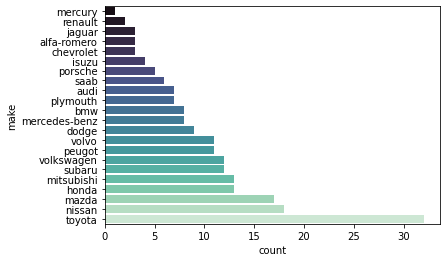

In [16]:
plt.figure()
sns.countplot(data=auto_cat,y="make",palette="mako",
             order=auto_cat["make"].value_counts(ascending=True).index)
plt.show()

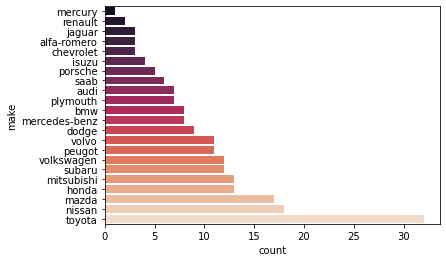

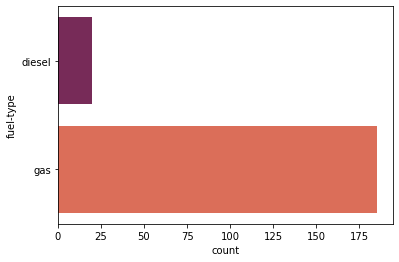

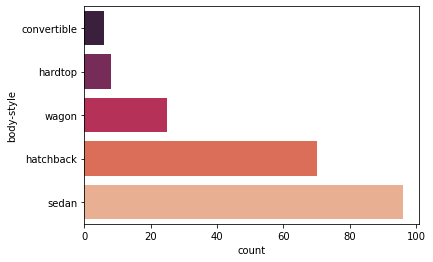

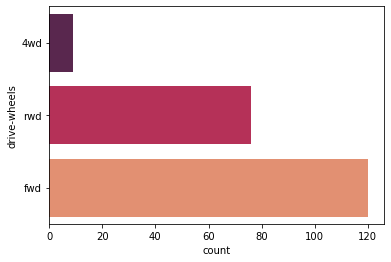

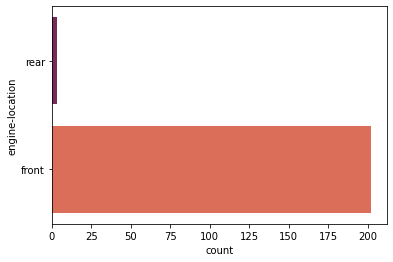

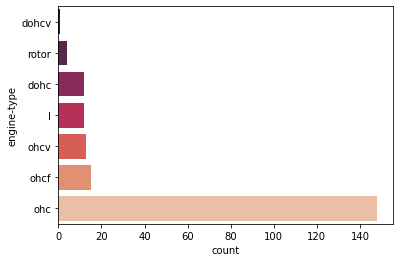

In [17]:
for col in auto_cat:
    sns.countplot(data=auto_cat,y=col,palette="rocket",
             order=auto_cat[col].value_counts(ascending=True).index)
    plt.show()

In machine Learning Algorithms we cannot pass categorical data i.e object data...
Machine only understands number Therefore encoding of categorical data is needed There are 2 techniques for encoding Label encoding===Gender ===Male, Female & Male===0 & Female==1
One hot encoding========One hot coding ===It depends on the presence of category It will create columns as per category in the column Male Female 1 0 i.e 1 means male is present in 1st row of the column and female is absent 0 1 i.e Female is present and male is absentin 2nd row In label encoding only column is created In One hot encoding no of columns are depend no of categories.... If categories are more than it will lead to large data creation
In Label encoding one Fundamental Problem is that if any categories got large number as label then it will get output as large number if any formula is set.

In [18]:
auto_cat["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
#ONE HOT CODDING

In [20]:
pd.get_dummies(auto_cat["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
#LABEL ENCODING

In [22]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.



Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib!

The functionality that scikit-learn provides include:

Regression, including Linear and Logistic Regression
Classification, including K-Nearest Neighbors
Clustering, including K-Means and K-Means++
Model selection
Preprocessing, including Min-Max Normalization

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
pd.get_dummies(auto_cat["body-style"])

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [26]:
le.fit_transform(auto_cat["body-style"])

#PERFORMING LABEL ENCODING ON BODY STYLE JUST TO CHECK THE OUTPUT

array([0, 0, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3,
       3, 3, 4, 1, 3, 3, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 2, 3, 4, 1, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4,
       4, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 3, 3, 4, 2, 2, 1, 1, 0, 2, 4, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 4,
       4, 4, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2, 0, 3, 3, 2,
       3, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 3, 3, 3, 3])

In [27]:
auto_cat["body-style"]=le.fit_transform(auto_cat["body-style"])

#labeled no. = body style
#0 = convertible
#1 = hardtop
#2 = hatchback
#3 = sedan
#4 = wagon

#about category labeled are assigned with use of ASCII character or alphabeticaly as per ASCII

In [28]:
auto_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,0,rwd,front,dohc
1,alfa-romero,gas,0,rwd,front,dohc
2,alfa-romero,gas,2,rwd,front,ohcv
3,audi,gas,3,fwd,front,ohc
4,audi,gas,3,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,3,rwd,front,ohc
201,volvo,gas,3,rwd,front,ohc
202,volvo,gas,3,rwd,front,ohcv
203,volvo,diesel,3,rwd,front,ohc


In [29]:
#LABEL ENCODING ALL CULUMNS IN DATA

for col in auto_cat:
    le=LabelEncoder()
    auto_cat[col]=le.fit_transform(auto_cat[col])

In [30]:
auto_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [31]:
auto_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


NUMERICAL DATA ANALYSIS / SKEWNESS

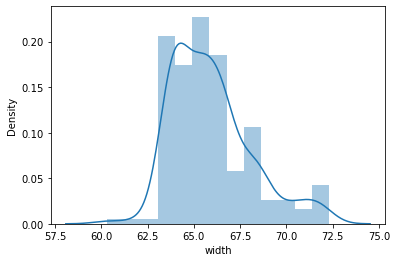

In [32]:
plt.figure()
sns.distplot(auto_num["width"])
plt.show()

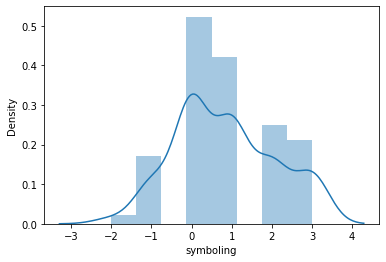

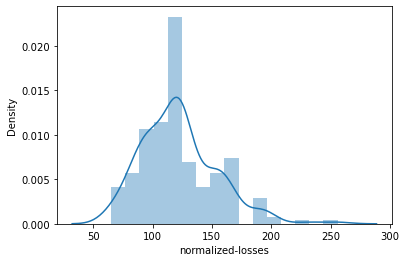

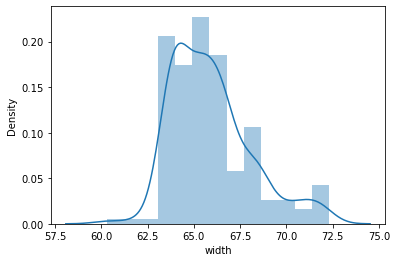

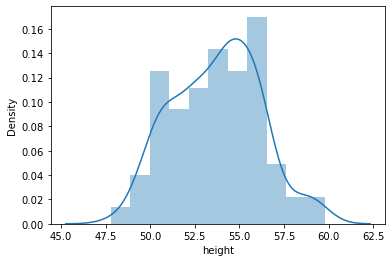

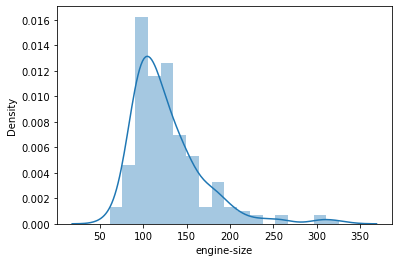

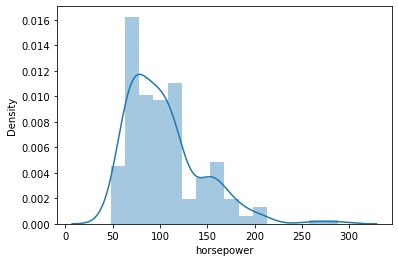

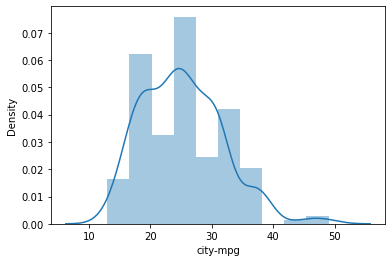

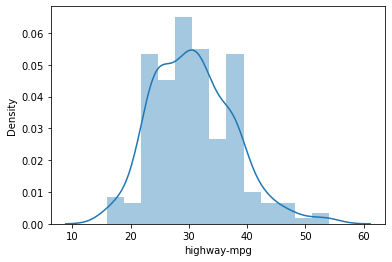

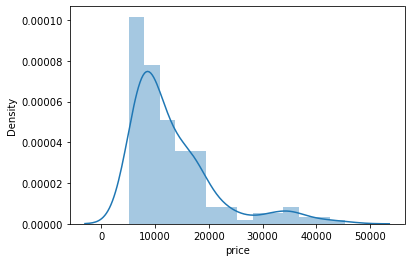

In [33]:
#CHEKING SKEWNESS OF ALL COLUMNS IN NUMERICAL DATA AUTO NUM

for col in auto_num:
    plt.figure()
    sns.distplot(auto_num[col])
    plt.show()
    

skew>0 then positive skewness
skew<0 then negative skewness
skew=o then no sekwness / data distributed properlt

for getting numerical skewness on all column we can use library scipy.

# skipy

1.SciPy is a scientific computation library that uses NumPy underneath.
2.SciPy stands for Scientific Python.
3.It provides more utility functions for optimization, stats and signal processing.
4.Like NumPy, SciPy is open source so we can use it freely.
5.SciPy was created by NumPy's creator Travis Olliphant.

Why Use SciPy?
1.If SciPy uses NumPy underneath, why can we not just use NumPy?
2.SciPy has optimized and added functions that are frequently used in NumPy and Data Science.
3.Which Language is SciPy Written in?
SciPy is predominantly written in Python, but a few segments are written in C.


In [34]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
from scipy.stats import skew #for using mathematical funcion skew

In [36]:
skew(auto_num["width"])

0.8973753485201392

In [37]:
for col in auto_num:
    print("skewness of", col)
    print(skew(auto_num[col]))
    print("-------------------")

skewness of symboling
0.20952469094997359
-------------------
skewness of normalized-losses
0.8485348696008058
-------------------
skewness of width
0.8973753485201392
-------------------
skewness of height
0.06265991683394276
-------------------
skewness of engine-size
1.9333748457840114
-------------------
skewness of horsepower
1.3877040597952843
-------------------
skewness of city-mpg
0.6588377533622138
-------------------
skewness of highway-mpg
0.5360379305163596
-------------------
skewness of price
1.791937476907277
-------------------


In [38]:
#ENGINE SIZE, HORSEPOWER AND PRICE ARE VERY HIGHLY POSITIVE SKEWNESS

#WE HAVE 2 METHODS TO SHRINK OUR DATA
#1) SQRT
#2) LOG

print(np.sqrt(45000))
print(np.sqrt(5500))

212.13203435596427
74.16198487095663


In [39]:
print(np.log(45000))
print(np.log(5500))

10.714417768752456
8.612503371220562


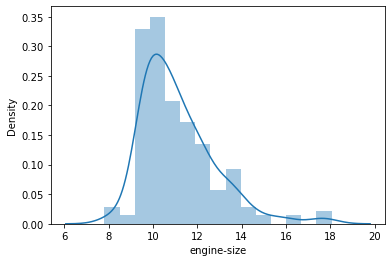

skewness : 1.3543684515048457


In [40]:
plt.figure()
sns.distplot(np.sqrt(auto_num["engine-size"]))
plt.show()

print("skewness :",skew(np.sqrt(auto_num["engine-size"])))

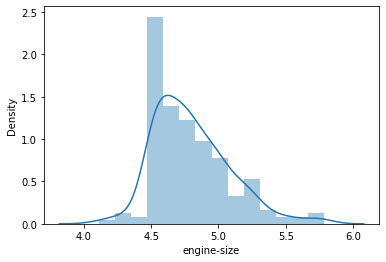

skewness : 0.8515380844251106


In [41]:
plt.figure()
sns.distplot(np.log(auto_num["engine-size"]))
plt.show()

print("skewness :",skew(np.log(auto_num["engine-size"])))

In [42]:
#AS WE CAN SEE IN THE ABOVE EXAMPLE LOG METHOD SHRINKS THE DATA AT VERY HIG LEVEL DUE TO WHICH
#OUR SKEWNESS GETS DECRESED

col=["engine-size","horsepower","price"]

for i in col:
    auto_num[i]=np.log(auto_num[i])

In [43]:
auto_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,4.867534,4.709530,21,27,9.510075
1,3,122.0,64.1,48.8,4.867534,4.709530,21,27,9.711116
2,1,122.0,65.5,52.4,5.023881,5.036953,19,26,9.711116
3,2,164.0,66.2,54.3,4.691348,4.624973,24,30,9.543235
4,2,164.0,66.4,54.3,4.912655,4.744932,18,22,9.767095
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,4.948760,4.736198,23,28,9.731809
201,-1,95.0,68.8,55.5,4.948760,5.075174,19,25,9.854560
202,-1,95.0,68.9,55.5,5.153292,4.897840,18,23,9.975110
203,-1,95.0,68.9,55.5,4.976734,4.663439,26,27,10.019936


In [44]:
for col in auto_num:
    print("skewness of", col)
    print(skew(auto_num[col]))
    print("-------------------")

skewness of symboling
0.20952469094997359
-------------------
skewness of normalized-losses
0.8485348696008058
-------------------
skewness of width
0.8973753485201392
-------------------
skewness of height
0.06265991683394276
-------------------
skewness of engine-size
0.8515380844251106
-------------------
skewness of horsepower
0.4673945372869386
-------------------
skewness of city-mpg
0.6588377533622138
-------------------
skewness of highway-mpg
0.5360379305163596
-------------------
skewness of price
0.6644926145446154
-------------------


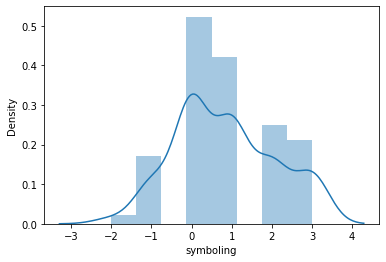

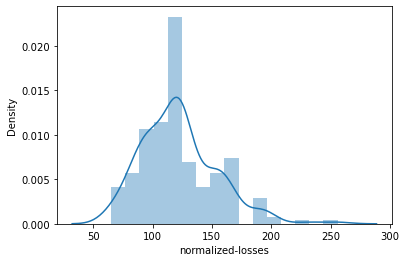

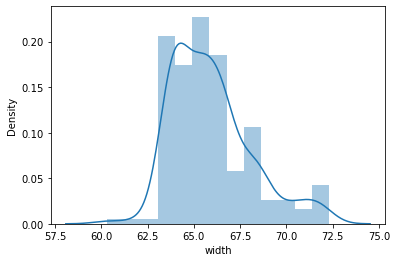

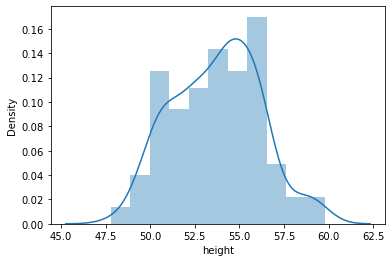

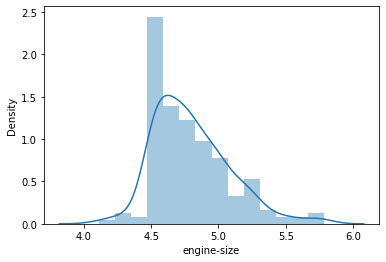

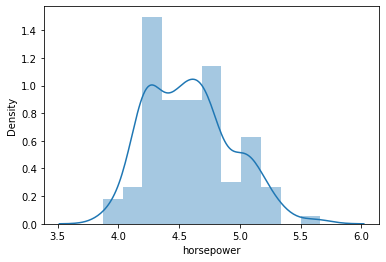

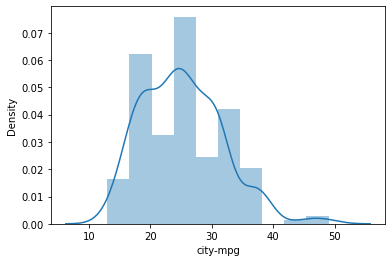

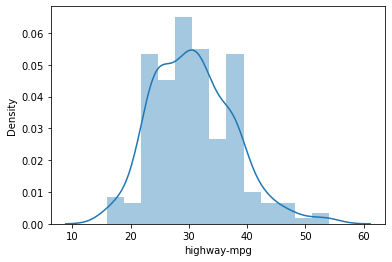

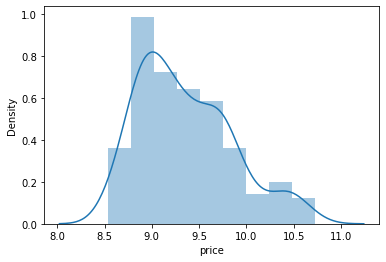

In [45]:

for col in auto_num:
    plt.figure()
    sns.distplot(auto_num[col])
    plt.show()

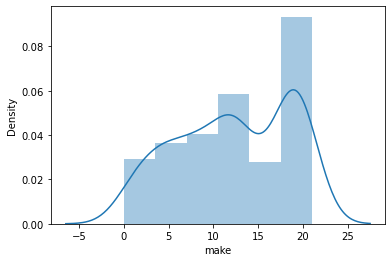

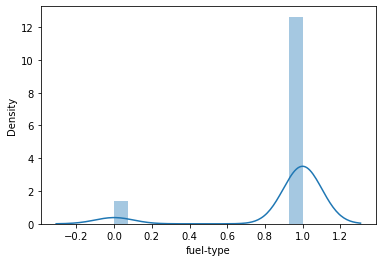

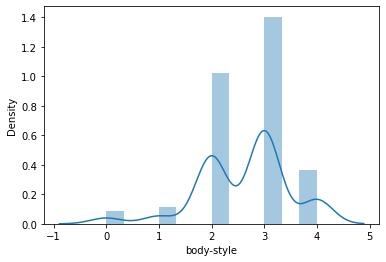

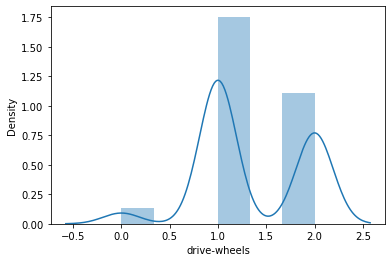

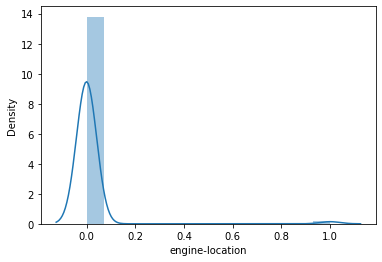

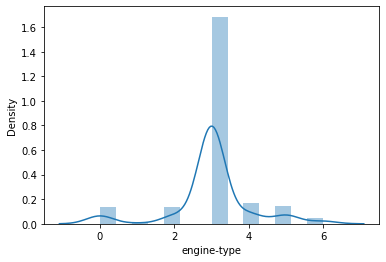

In [46]:
#CHECKING SKEWNESS OF AUTO_CAT DATA WHICH IS CONVERTED INTO NUMERICAL


for col in auto_cat:
    plt.figure()
    sns.distplot(auto_cat[col])
    plt.show()

In [47]:
for col in auto_cat:
    print("skewness of", col, ":", skew(auto_cat[col]))
    print("-------------------------------------------")

skewness of make : -0.2428775100555365
-------------------------------------------
skewness of fuel-type : -2.712583290538397
-------------------------------------------
skewness of body-style : -0.6604229011586394
-------------------------------------------
skewness of drive-wheels : -0.05792444798139604
-------------------------------------------
skewness of engine-location : 8.083822413838753
-------------------------------------------
skewness of engine-type : -0.5316755503859271
-------------------------------------------


NOTE

SKEWNESS of categorical data is descrete it is not continuous in nature.
we have converted categorical dada into numerical but still it has identity of category only therefore we don not get proper skewness in categorical data.

# scaling

In [48]:
auto_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,4.867534,4.709530,21,27,9.510075
1,3,122.0,64.1,48.8,4.867534,4.709530,21,27,9.711116
2,1,122.0,65.5,52.4,5.023881,5.036953,19,26,9.711116
3,2,164.0,66.2,54.3,4.691348,4.624973,24,30,9.543235
4,2,164.0,66.4,54.3,4.912655,4.744932,18,22,9.767095
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,4.948760,4.736198,23,28,9.731809
201,-1,95.0,68.8,55.5,4.948760,5.075174,19,25,9.854560
202,-1,95.0,68.9,55.5,5.153292,4.897840,18,23,9.975110
203,-1,95.0,68.9,55.5,4.976734,4.663439,26,27,10.019936


In [49]:
#TWO TYEPS OF SCALING

#1) MIN MAX SCALAR : x-min/max-min
#2) STANDARD SCALAR : x-mean/std

In [50]:
#MINMAX SCALER will always gives us positive number between the range of 0-1 due we are substracting from min 
#and dividing with positive number which gets generated by max-min

#standard scalar will give positive as well as negative number both because we are substracting from mean and dividing
#standard deviation.. there is no fix range in which we will get number.

In [51]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [52]:
mm=MinMaxScaler()

In [53]:
mm.fit_transform(auto_num[["price"]])

array([[0.44419023],
       [0.53629482],
       [0.53629482],
       [0.45938221],
       [0.56194105],
       [0.50020231],
       [0.56871682],
       [0.59899521],
       [0.70556376],
       [0.39039906],
       [0.53434707],
       [0.54794593],
       [0.64612537],
       [0.64906531],
       [0.71861647],
       [0.82164826],
       [0.95680378],
       [0.90477936],
       [0.00294451],
       [0.09483087],
       [0.11476854],
       [0.0389373 ],
       [0.10076014],
       [0.20217095],
       [0.09000216],
       [0.12284927],
       [0.18168288],
       [0.23553003],
       [0.25456178],
       [0.42579922],
       [0.10803006],
       [0.1338746 ],
       [0.02448748],
       [0.11155205],
       [0.15183025],
       [0.16237577],
       [0.16237577],
       [0.19858721],
       [0.26341152],
       [0.25064208],
       [0.32019018],
       [0.42512728],
       [0.32240985],
       [0.12917227],
       [0.30687062],
       [0.68845796],
       [0.35253064],
       [0.843

In [54]:
ss=StandardScaler()

In [55]:
ss.fit_transform(auto_num[["price"]])

array([[ 3.14604091e-01],
       [ 7.17856864e-01],
       [ 7.17856864e-01],
       [ 3.81117681e-01],
       [ 8.30141323e-01],
       [ 5.59836430e-01],
       [ 8.59807039e-01],
       [ 9.92372053e-01],
       [ 1.45895102e+00],
       [ 7.90952971e-02],
       [ 7.09329214e-01],
       [ 7.68867807e-01],
       [ 1.19871757e+00],
       [ 1.21158920e+00],
       [ 1.51609845e+00],
       [ 1.96719278e+00],
       [ 2.55893137e+00],
       [ 2.33115776e+00],
       [-1.61726020e+00],
       [-1.21496287e+00],
       [-1.12767168e+00],
       [-1.45967642e+00],
       [-1.18900332e+00],
       [-7.45005996e-01],
       [-1.23610396e+00],
       [-1.09229257e+00],
       [-8.34706941e-01],
       [-5.98953108e-01],
       [-5.15628184e-01],
       [ 2.34084448e-01],
       [-1.15717411e+00],
       [-1.04402140e+00],
       [-1.52294066e+00],
       [-1.14175412e+00],
       [-9.65407891e-01],
       [-9.19237455e-01],
       [-9.19237455e-01],
       [-7.60696333e-01],
       [-4.7

In [56]:
for col in auto_num:
    ss=StandardScaler()
    auto_num[col]= ss.fit_transform(auto_num[[col]])

In [57]:
auto_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,1.743470,0.000000,-0.844782,-2.020417,0.238597,0.362860,-0.646553,-0.546059,0.314604
1,1.743470,0.000000,-0.844782,-2.020417,0.238597,0.362860,-0.646553,-0.546059,0.717857
2,0.133509,0.000000,-0.190566,-0.543527,0.792476,1.314661,-0.953012,-0.691627,0.717857
3,0.938490,1.328961,0.136542,0.235942,-0.385569,0.117056,-0.186865,-0.109354,0.381118
4,0.938490,1.328961,0.230001,0.235942,0.398443,0.465772,-1.106241,-1.273900,0.830141
...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.854332,1.398245,0.728239,0.526350,0.440383,-0.340094,-0.400490,0.759364
201,-1.476452,-0.854332,1.351515,0.728239,0.526350,1.425768,-0.953012,-0.837195,1.005580
202,-1.476452,-0.854332,1.398245,0.728239,1.250934,0.910267,-1.106241,-1.128332,1.247383
203,-1.476452,-0.854332,1.398245,0.728239,0.625452,0.228876,0.119594,-0.546059,1.337296


FEATURE ENGINEERING

CREATING FOR FEATURES FROM EXISTING FEATURES


In [58]:
auto_num["area"]=auto_num["width"]*auto_num["height"]

In [59]:
auto_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,1.743470,0.000000,-0.844782,-2.020417,0.238597,0.362860,-0.646553,-0.546059,0.314604,1.706813
1,1.743470,0.000000,-0.844782,-2.020417,0.238597,0.362860,-0.646553,-0.546059,0.717857,1.706813
2,0.133509,0.000000,-0.190566,-0.543527,0.792476,1.314661,-0.953012,-0.691627,0.717857,0.103578
3,0.938490,1.328961,0.136542,0.235942,-0.385569,0.117056,-0.186865,-0.109354,0.381118,0.032216
4,0.938490,1.328961,0.230001,0.235942,0.398443,0.465772,-1.106241,-1.273900,0.830141,0.054267
...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.854332,1.398245,0.728239,0.526350,0.440383,-0.340094,-0.400490,0.759364,1.018256
201,-1.476452,-0.854332,1.351515,0.728239,0.526350,1.425768,-0.953012,-0.837195,1.005580,0.984226
202,-1.476452,-0.854332,1.398245,0.728239,1.250934,0.910267,-1.106241,-1.128332,1.247383,1.018256
203,-1.476452,-0.854332,1.398245,0.728239,0.625452,0.228876,0.119594,-0.546059,1.337296,1.018256


In [60]:
pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install Numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: Numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.


In [62]:
from ydata_profiling import ProfileReport as pp

AttributeError: module 'numba' has no attribute 'generated_jit'

In [65]:
pip install --upgrade numba

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
